In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import random as rand
from collections import deque as queue
import time
from guppy import hpy

Above we generate a array of fixed size 5x5 and fill it with zeros, which indicate a free space.
below we randomly generate 5 position and make them obstacles denoted by the integer 1

In [2]:
BinaryMat = np.zeros((5,5))
CostArr = np.zeros((5,5))
global count 
count = 0
leng = len(BinaryMat)
h = hpy()
begin = time.time()

In [3]:

while(count != 4):
    x = rand.randrange(leng)
    y = rand.randrange(leng)
    BinaryMat[x,y] = 1
    count = count +1


In [4]:
print(BinaryMat)

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [5]:
for i in range(len(CostArr)):
    for j in range(len(CostArr)):
        CostArr[i][j] = rand.randrange(1,9)
print(CostArr)

[[4. 8. 4. 6. 6.]
 [5. 6. 4. 7. 7.]
 [3. 3. 7. 6. 2.]
 [2. 5. 5. 6. 7.]
 [3. 5. 5. 6. 6.]]


Search functions that are gloabl 

In [6]:
Dx = [-1, 1 ,0 ,0] #the first four values are the directional movement the last is the cost
Dy = [0, 0 ,-1 ,1]

visited = [] # registers visted nodes. 
q=[] # queue array to store the next node 
que = []
visit =[]
v= []
visited =[[ False for i in range(4)] for i in range(4)]
visit =[[ False for i in range(5)] for i in range(5)]
v =[[ False for i in range(5)] for i in range(5)]
PathCost = 0

In [7]:
def BFS(grid, visit, x, y , Gx, Gy):
    
    
    visit[x][y] = True ## marks the current node as visited
  
                
    for i in range(4):
        adjx = x +Dx[i]            #find the next two nodes
        adjy = y +Dy[i]
        if (adjx < 4 and adjx > 0 and adjy < 4 and adjy > 0 and grid[adjx][adjy] != 1):  #checks theyre valid
            q.append(adjx) #adds them to the queue
            q.append(adjy)

            visit[adjx][adjy] = True
    if(len(q)!= 0): 
            adjx = q.pop(0)   #assigns them to the next node to search 
            adjy = q.pop(0)


    if(adjx == Gx and adjy == Gy):        #checks if theyre the goal 
        visit[adjx][adjy] = True
        return( print("Goal reached"),
                print("Path = ", visited),   # not correct
                print("iterations = " ,len(visited)))
    else:
        plt.imshow(BinaryMat, cmap ='Greys', alpha=0.2)

        plt.imshow(visited, cmap='Greens_r', alpha=0.7)
        plt.show()
        BFS(BinaryMat, visited, adjx,adjy, Gx, Gy )   # if not goal go again with new starting points

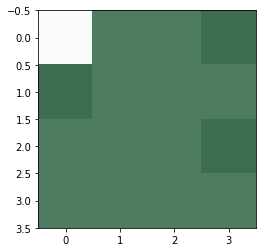

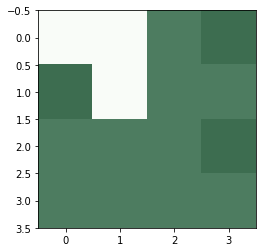

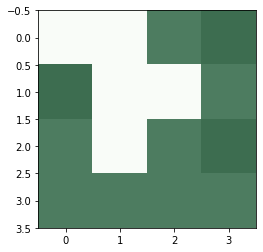

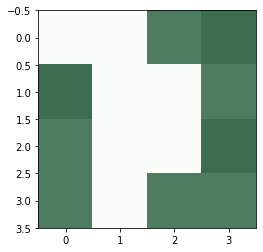

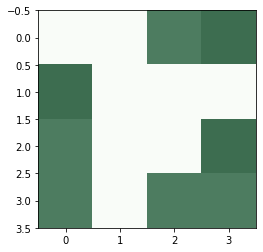

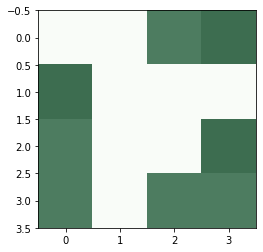

Goal reached
Path =  [[True, True, False, False], [False, True, True, True], [False, True, True, False], [False, True, True, False]]
iterations =  4


In [8]:

BFS(BinaryMat, visited, 0,0 , 2,2)


In [9]:
def DFS(grid, visit, x,y, gx,gy):
   
 stack = []
 stack.append([x,y])
 visit[x][y] = True
 print(x , ' ', y ,' ' )
 #while(len(stack) != 0):
 curr = stack[len(stack) -1]

 x = curr[0]
 y = curr[1]
 print(x , ' ', y ,' ', len(stack) )


 for i in range(4):
     adjx = x + Dx[i]
     adjy = y + Dy[i]

     if (adjx < 4 and adjx > 0 and adjy < 4 and adjy > 0 and visit[adjx][adjy] != True 
         and grid[adjx][adjy] != 1):
            stack.pop()
            stack.append([adjx,adjy])
            x = adjx
            y =adjy
            print(adjx,adjy)
 print(stack)
 if(adjx == gx and adjy == gy):        #checks if theyre the goal 
        visit[gx][gy] = True
        print("goal reached")
 else:
     plt.imshow(BinaryMat, cmap ='Greys', alpha=0.2)

     plt.imshow(visit, cmap='Greens_r', alpha=0.7)
     plt.show()
     DFS(grid, visit, adjx, adjy, gx, gy)

0   0  
0   0   1
[[0, 0]]


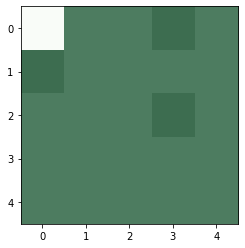

0   1  
0   1   1
1 1
1 2
[[1, 2]]


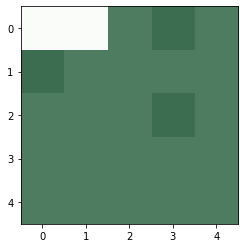

1   2  
1   2   1
2 2
2 1
2 2
[[2, 2]]
goal reached


In [10]:


DFS(BinaryMat,visit,  0,0 , 2,2)

My implmentation of DFS never seemed to be able to break a loop although I know others managed to get this working 

In [11]:
#UCS

def UCS(grid, v, x, y , Gx, Gy, pathcost):
    #global count 
   # count = count +1
    cost = [] 
   # print(x,y)

    
    v[x][y] = True ## marks the current node as visited
    pathcost = pathcost + CostArr[x][y]
    #print('this is path cost at the start ', pathcost)            
    for i in range(4):
        adjx = x +Dx[i]            #find the next two nodes
        adjy = y +Dy[i]
        if (adjx < 4 and adjx > 0 and adjy < 4 and adjy > 0 and grid[adjx][adjy] != 1):#checks theyre valid
                que.append((adjx,adjy))
                temp = CostArr[adjx][adjy]
                cost.append(temp)  
                print('queue = ',que)
    if (len(cost) > 1 and len(que) > 1):
        for i in range(len(cost)):
           # print(cost[i], ' vs ' , cost[i-1])
            if (cost[i] <= cost [i-1]and i != 0 ):
                print(que)
                adjx,adjy = que.pop(i)
            elif(cost[i] > cost[i-1] and i != 0):
               # print(que[i-1])
                adjx,adjy = que.pop(i-1)
    elif(len(que) == 1):
        adjx,adjy = que.pop()
                
    if(adjx == Gx and adjy == Gy):        #checks if theyre the goal 
        v[adjx][adjy] = True
        return( print("Goal reached"),
                print("Path = ", visited),   # not correct
                print("iterations = " ),
                print("cost of path = ", pathcost))
    else:
        plt.imshow(BinaryMat, cmap ='Greys', alpha=0.2)

        plt.imshow(v, cmap='Greens_r', alpha=0.7)
        plt.show()
        print(len(cost))
        print('path cost is equal to ', pathcost, ' x adn y = ' , adjx, adjy)
        UCS(BinaryMat, visit, adjx,adjy, Gx, Gy, pathcost )   # if not goal go again with new starting points

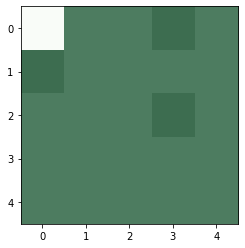

0
path cost is equal to  4.0  x adn y =  0 1
queue =  [(1, 1)]


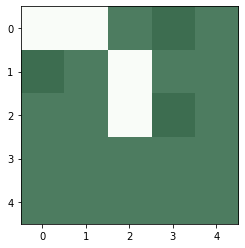

1
path cost is equal to  12.0  x adn y =  1 1
queue =  [(2, 1)]
queue =  [(2, 1), (1, 2)]


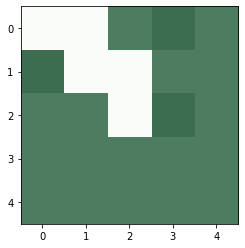

2
path cost is equal to  18.0  x adn y =  2 1
queue =  [(1, 2), (1, 1)]
queue =  [(1, 2), (1, 1), (3, 1)]
queue =  [(1, 2), (1, 1), (3, 1), (2, 2)]
[(1, 2), (1, 1), (3, 1), (2, 2)]


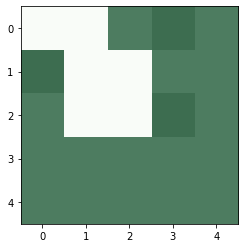

3
path cost is equal to  21.0  x adn y =  3 1
queue =  [(1, 2), (2, 2), (2, 1)]
queue =  [(1, 2), (2, 2), (2, 1), (3, 2)]


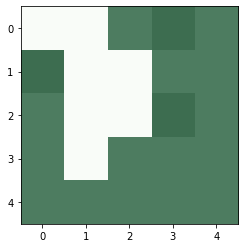

2
path cost is equal to  26.0  x adn y =  1 2
queue =  [(2, 2), (2, 1), (3, 2), (2, 2)]
queue =  [(2, 2), (2, 1), (3, 2), (2, 2), (1, 1)]
queue =  [(2, 2), (2, 1), (3, 2), (2, 2), (1, 1), (1, 3)]
[(2, 2), (2, 1), (3, 2), (2, 2), (1, 1), (1, 3)]


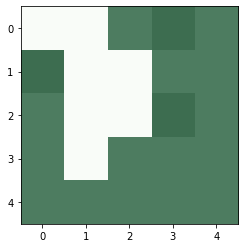

3
path cost is equal to  30.0  x adn y =  3 2
queue =  [(2, 2), (2, 2), (1, 1), (1, 3), (2, 2)]
queue =  [(2, 2), (2, 2), (1, 1), (1, 3), (2, 2), (3, 1)]
queue =  [(2, 2), (2, 2), (1, 1), (1, 3), (2, 2), (3, 1), (3, 3)]
[(2, 2), (2, 2), (1, 1), (1, 3), (2, 2), (3, 1), (3, 3)]


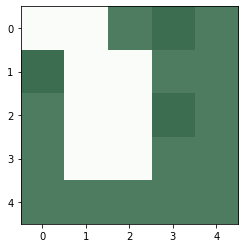

3
path cost is equal to  35.0  x adn y =  1 1
queue =  [(2, 2), (1, 3), (2, 2), (3, 1), (3, 3), (2, 1)]
queue =  [(2, 2), (1, 3), (2, 2), (3, 1), (3, 3), (2, 1), (1, 2)]
Goal reached
Path =  [[True, True, False, False], [False, True, True, True], [False, True, True, False], [False, True, True, False]]
iterations = 
cost of path =  41.0


In [12]:
UCS(BinaryMat,v,  0,0 , 2,2,0)

the following codes are the same functions but with the visited recognition removed as a tree does not record what it has visited

In [13]:
time.sleep(1)
end = time.time()
print(f"Total time taken = {end - begin}")
h = h.heap()
print( h.byrcs)

Total time taken = 2.354504108428955
Partition of a set of 454367 objects. Total size = 56999620 bytes.
 Index  Count   %     Size   % Cumulative  % Referrers by Kind (class / dict of class)
     0 119583  26  9549723  17   9549723  17 types.CodeType
     1  59110  13  8179754  14  17729477  31 function
     2  71496  16  5029020   9  22758497  40 tuple
     3  10195   2  4273980   7  27032477  47 function, tuple
     4  30116   7  3920383   7  30952860  54 dict of type
     5  32568   7  3498117   6  34450977  60 dict (no owner)
     6  12417   3  2627368   5  37078345  65 type
     7  11948   3  2472013   4  39550358  69 dict of module
     8  27822   6  1994725   3  41545083  73 list
     9    859   0  1317304   2  42862387  75 function, module
<3422 more rows. Type e.g. '_.more' to view.>


def BFS_tree(grid, x, y , Gx, Gy):
    
    
  
  
                
    for i in range(4):
        adjx = x +Dx[i]            #find the next two nodes
        adjy = y +Dy[i]
        if (adjx < 4 and adjx > 0 and adjy < 4 and adjy > 0):  #checks theyre valid
            q.append(adjx) #adds them to the queue
            q.append(adjy)

           
    if(len(q)!= 0): 
            adjx = q.pop(0)   #assigns them to the next node to search 
            adjy = q.pop(0)


    if(adjx == Gx and adjy == Gy):        #checks if theyre the goal 
       
        return( print("Goal reached"),   # not correct
                print("iterations = " ,len(visited)))
    else:

        BFS_tree(BinaryMat, adjx,adjy, Gx, Gy )   # if not goal go again with new starting points
        
def DFS_tree(grid,x,y, gx,gy):
   
 stack = []
 stack.append([x,y])
 
 print(x , ' ', y ,' ' )
 #while(len(stack) != 0):
 curr = stack[len(stack) -1]

 x = curr[0]
 y = curr[1]
 print(x , ' ', y ,' ', len(stack) )


 for i in range(4):
     adjx = x + Dx[i]
     adjy = y + Dy[i]

     if (adjx < 4 and adjx > 0 and adjy < 4 and adjy > 0 ):
            stack.pop()
            stack.append([adjx,adjy])
            x = adjx
            y =adjy
            print(adjx,adjy)
 print(stack)
 if(adjx == gx and adjy == gy):        #checks if theyre the goal 
       
        print("goal reached")
 else:
     DFS_tree(grid,  adjx, adjy, gx, gy)   
        #UCS

def UCS_tree(grid,  x, y , Gx, Gy, pathcost):
    #global count 
   # count = count +1
    cost = [] 
   # print(x,y)

    
    pathcost = pathcost + CostArr[x][y]
    #print('this is path cost at the start ', pathcost)            
    for i in range(4):
        adjx = x +Dx[i]            #find the next two nodes
        adjy = y +Dy[i]
        if (adjx < 4 and adjx > 0 and adjy < 4 and adjy > 0):#checks theyre valid
                que.append((adjx,adjy))
                temp = CostArr[adjx][adjy]
                cost.append(temp)  
                print('queue = ',que)
    if (len(cost) > 1 and len(que) > 1):
        for i in range(len(cost)):
           # print(cost[i], ' vs ' , cost[i-1])
            if (cost[i] <= cost [i-1]and i != 0 ):
                print(que)
                adjx,adjy = que.pop(i)
            elif(cost[i] > cost[i-1] and i != 0):
               # print(que[i-1])
                adjx,adjy = que.pop(i-1)
    elif(len(que) == 1):
        adjx,adjy = que.pop()
                
    if(adjx == Gx and adjy == Gy):        #checks if theyre the goal 
       
        return( print("Goal reached"), # not correct
                print("iterations = " ),
                print("cost of path = ", pathcost))
    else:
        print(len(cost))
        print('path cost is equal to ', pathcost, ' x adn y = ' , adjx, adjy)
        UCS_tree(BinaryMat, adjx,adjy, Gx, Gy, pathcost )   # if not goal go again with new starting points